<a href="https://colab.research.google.com/github/YLysov0017/Pproject/blob/master/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [2]:
data_dict = {"X":
                   [
                   0.09425528, 0.98299627, 1.81560963,-0.11319581, 1.83395763, 1.62955608,
                   0.7813819 , 1.21366734, 1.85473109, 2.50689725, 1.15905647, 3.3259778 ,
                   2.03840783, 1.522197 , 1.58880831, 0.24164591,-1.17926908, 2.22459584,
                   1.14340352, 0.53005625, 1.96160206, 1.73115471, 1.65569494, 3.61613664,
                   2.45261566, 1.02092152, 1.69333318, 1.57819127, 1.2595713 , 0.71500018,
                   1.79534747, 2.27025828, 0.61270015, 0.6901326 , 0.37118753,-0.12459309,
                   0.16186385, 8.05829795, 7.70059453, 7.14750058, 6.99652798, 7.4288918 ,
                   6.58211545, 7.09818326, 7.44763608, 6.93589244, 7.84784203, 8.54679416,
                   6.84661005, 7.62520107, 7.16880078, 8.19386837, 7.15468544, 7.81925323,
                   7.13013904, 8.07188279, 7.645775 , 8.17482772, 8.00280808, 7.49993678,
                   7.50200359, 7.8119432 , 8.31045524, 7.33873533, 7.75698289, 7.41864878,
                   8.08243474, 8.37364489, 7.03800052, 8.38780976, 7.46269981, 6.64303309,
                   7.0761489 , 7.27117256,13.66451089,13.06893953,12.86351614,13.13963735,
                   12.77850307,13.34508227,13.00348344,12.7157923 ,13.02857859,12.82435577,
                   12.47986662,12.89919459,13.39586595,13.18986811,12.79232163,12.72643205,
                   11.91565036,13.15701534,12.83448933,11.8705859 ,12.80876731,13.7973638 ,
                   13.09519651,13.04554758,12.39033983,14.05262095,13.47344821,12.49101069,
                   12.89379772,12.75828482,12.82841068,13.31763767,12.69809475,12.68100933,
                   13.14973262,12.78978187,12.96165026,20.26776841,21.90991597,21.11243327,
                   22.42115877,19.69478429,20.61439155,20.73959909,17.9242048 ,20.54302073,
                   19.14969807,17.97200709,20.38025207,19.24449251,21.83995318,17.39357883,
                   20.66520461,20.95301793,22.20382955,20.90481094,20.93562179,19.86698425,
                   18.69526049,19.43767259,19.70275583,19.13209005,23.15332174,19.53765188,
                   23.45304644,18.42073087,20.58744113,17.96711235,21.10754821,23.30001462,
                   19.73496443,19.76580918,20.01923837,20.99089301
                   ],
            "Y":
                   [
                   5.28294389, 5.85944412, 6.00114413, 5.81031119, 5.77147999, 5.75889621,
                   5.74798166, 5.91855794, 6.49782695, 5.95595843, 5.49058598, 6.46340506,
                   5.71371295, 5.48942882, 4.96861643, 6.10694189, 5.83968159, 6.07855268,
                   5.79027601, 5.14773601, 5.35537736, 5.40695991, 5.98233438, 5.5846475 ,
                   5.77623078, 6.30956347, 6.79884725, 5.65410994, 5.02802157, 5.94238539,
                   5.96428098, 6.33566266, 6.14111665, 5.88847225, 5.89295491, 6.28346775,
                   5.52190547, 1.5567175 , 0.97850715, 1.74113515, 1.25331386, 1.40773538,
                   1.59770735, 1.16815289, 1.11040104, 3.13170036, 1.04541005, 1.81928273,
                   1.92414462, 1.97485205, 2.20459819, 2.23058571, 1.66129234, 2.17530974,
                   1.89922316, 1.3119379 , 2.16102775, 2.09255829, 1.76435655, 2.26751796,
                   1.44097679, 1.28541271, 1.89612013, 1.8305107 , 1.8872032 , 2.09623261,
                   1.59252096, 1.54813431, 0.64906524, 1.32984631, 1.81635643, 1.52680013,
                   1.58028442, 2.41913255, 8.45947363, 9.62376999, 8.36913465, 8.91990567,
                   11.53765561, 9.75464325,10.71738311, 9.52608771,11.20207216, 8.54456422,
                   10.82630008,10.12504466,11.4513495 , 9.75050633,10.03881721, 9.07867625,
                   8.60758784,11.38248184,10.89776317, 7.85644963,10.56107128, 7.23650088,
                   10.75671923, 8.93266255, 9.2822122 , 8.8725894 , 9.44602539, 8.22603278,
                   8.82682425, 9.52128671,10.39913884,10.4789032 , 7.96103398,10.15811737,
                   8.45658974, 8.48343077, 8.68729184,18.80486763,17.02594712,20.63149615,
                   20.09261278,17.89144526,21.99465957,17.82636786,21.91020002,17.59037101,
                   17.88030016,16.51222436,22.04663902,20.6767166 ,19.27531786,18.16484084,
                   19.41511979,19.59169492,21.24778447,22.5083675 ,18.83723016,20.04943831,
                   17.09281281,19.57578853,19.3334863 ,17.99067199,18.38048607,15.31933938,
                   14.05964313,19.80138684,19.54180712,18.69667406,20.29594099,21.65117625,
                   17.89746749,18.580564 ,20.28597979,18.33956623
                   ],
          "class":
                   [
                   'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
                   'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
                   'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
                   'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1', 'Class1',
                   'Class1', 'Class1', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2',
                   'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2',
                   'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2',
                   'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2',
                   'Class2', 'Class2', 'Class2', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3',
                   'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3',
                   'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3',
                   'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3', 'Class3',
                   'Class3', 'Class3', 'Class3', 'Class3', 'Class4', 'Class4', 'Class4', 'Class4', 'Class4',
                   'Class4', 'Class4', 'Class4', 'Class4', 'Class4', 'Class4', 'Class4', 'Class4', 'Class4',
                   'Class4', 'Class4', 'Class4', 'Class4', 'Class4', 'Class4', 'Class4', 'Class4', 'Class4',
                   'Class4', 'Class4', 'Class4', 'Class4', 'Class4', 'Class4', 'Class4', 'Class4', 'Class4',
                   'Class4', 'Class4', 'Class4', 'Class4', 'Class4'] }


In [14]:
X = np.c_[data_dict["X"], data_dict["Y"]]
Xnorm = (X - np.min(X)) / (np.max(X) - np.min(X))

In [18]:
ohe = OneHotEncoder(sparse_output = False)
Yenc = ohe.fit_transform( np.array(data_dict["class"]).reshape(-1,1) )

In [20]:
print(f"Форма тензора X: {Xnorm.shape}")
print(f"Форма тензора Y: {Yenc.shape}")

Форма тензора X: (148, 2)
Форма тензора Y: (148, 4)


In [26]:
xTrain, xTest, yTrain, yTest = train_test_split(Xnorm, Yenc, test_size = 0.25)
print(f"Форма тензора Xtrain: {xTrain.shape}")
print(f"Форма тензора Ytrain: {yTrain.shape}")
print(f"Форма тензора Xtest: {xTest.shape}")
print(f"Форма тензора Ytest: {yTest.shape}")

Форма тензора Xtrain: (111, 2)
Форма тензора Ytrain: (111, 4)
Форма тензора Xtest: (37, 2)
Форма тензора Ytest: (37, 4)


In [35]:
model = Sequential( [
 Dense( units = 4, activation = "relu", input_shape = (2,) ),
 Dense( units = 4, activation = "relu"),
 Dense( units = yTrain.shape[1], activation = "sigmoid" )
] )
model.compile( optimizer = "adam", loss = "categorical_crossentropy", metrics = ["categorical_accuracy"] )
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.3069 - loss: 1.3847
Epoch 2/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.5499 - loss: 1.3832 
Epoch 3/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4506 - loss: 1.3822 
Epoch 4/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4276 - loss: 1.3780 
Epoch 5/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2965 - loss: 1.3759 
Epoch 6/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2004 - loss: 1.3772 
Epoch 7/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3877 - loss: 1.3707 
Epoch 8/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.5629 - loss: 1.3679 
Epoch 9/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.5078 - loss: 1.3702 
Epoch 10/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4972 - loss: 1.3607 
Epoch 11/80
12/12 ━━━━━━━━━━━━

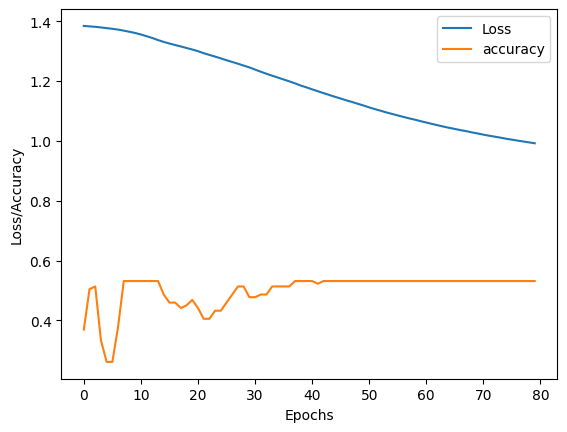

In [36]:
hist = model.fit( x = xTrain, y = yTrain, epochs = 80, batch_size = 10 )
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label = "Loss")
plt.plot(hist.history["categorical_accuracy"], label = "accuracy")
plt.ylabel("Loss/Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

In [37]:
model.evaluate(xTest, yTest)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - categorical_accuracy: 0.3953 - loss: 1.0580  


[1.0563478469848633, 0.4054054021835327]

In [38]:
match = 0
for i in range(len(xTest)):
  x = xTest[i]
  y = yTest[i]

  yPred = model.predict( x.reshape(1,-1) )

  maxLogit = np.argmax(yPred)

  yAct = np.argmax(y)
  if maxLogit == yAct:
    match += 1
  print(f"Распознали как группу {ohe.categories_[0][maxLogit]} на самом деле: {ohe.categories_[0][yAct]}" )
print(f"Верно распознано {match} из {len(xTest)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Распознали как группу Class3 на самом деле: Class4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Распознали как группу Class3 на самом деле: Class3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Распознали как группу Class1 на самом деле: Class1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Распознали как группу Class3 на самом деле: Class2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Распознали как группу Class3 на самом деле: Class2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Распознали как группу Class1 на самом деле: Class1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Распознали как группу Class3 на самом деле: Class2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Распознали как группу Class3 на самом деле: Class2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Распознали как группу Class3 на самом деле: Class4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Распознали как группу Class3 на самом деле: Class4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Распознали как группу Class1 на самом деле: Class1
1/1 ━━━━━━━━━━━━━━━━━